## Sampling $\pi$ : the circle in a sphere

Let us try to throw peebles in a square (with coordinate x[-1:1] and y[-1:1]): they will fall inside the unit circle with probability $\pi/4$. This gives us  a way to compute $\pi$ numerically with a Monte-Carlo simulation.

The following Python code is doing just that!

pi is approximatily 3.129


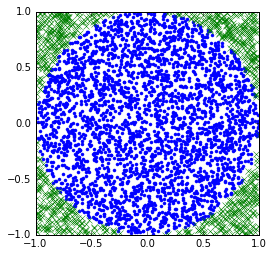

In [45]:
import random                     #Library of random numbers
import matplotlib.pyplot as plt   #Ploting Library 


num_trials = 4000                  #Number of thrown peebles
num_inside = 0
data_inside_x = []
data_inside_y = []
data_outside_x = []
data_outside_y = []


for i in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0: #Testing if we are inside the circle
        num_inside += 1
        data_inside_x.append(x)
        data_inside_y.append(y)
    else:
        data_outside_x.append(x)
        data_outside_y.append(y)
        
print "pi is approximatily", 4.0 * num_inside / float(n_trials)

plt.plot(data_inside_x,data_inside_y,'.')
plt.plot(data_outside_x,data_outside_y,'x')
plt.axes().set_aspect('equal')
plt.show() 



This is cute, but this is just one run. Let's try to see what happens when you repeat many runs, and how our estimate for $\pi$ is fluctuating.

In [27]:
import random
 
def direct_pi(N):
    num_inside = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            num_inside  += 1
    return num_inside 
 

    

3.16
3.157
3.156
3.13
3.103
3.168
3.083
3.151
3.168
3.121


Perhaps things will be more interesting if we plot an histogram?

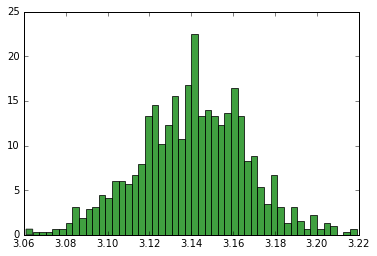

In [34]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Let us do more runs!

n_runs = 1000
n_trials = 4000
list_pi = []
for run in range(n_runs):
    list_pi.append(4*direct_pi(n_trials) / float(n_trials))
    
# prepare the histogram of the data
n, bins, patches = plt.hist(list_pi, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()    
    
    

The most likely value seem to be close to $\pi$. This is normal since we have an unbiased estimator, but there is some dispertion around this "true" value. If we repeat this plot with 20000 trials instead of 4000, things are much nicer (but it takes longer!)

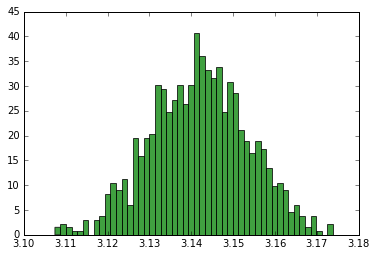

In [37]:
n_runs = 1000
n_trials = 20000
list_pi = []
for run in range(n_runs):
    list_pi.append(4*direct_pi(n_trials) / float(n_trials))
    
# prepare the histogram of the data
n, bins, patches = plt.hist(list_pi, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()    

See how the new distribution is less dispersed? We could go on and bound the probability of errors (for instance using Chernoff theorem) but instead, let us move to Markov-Chain Monte-Carlo sampling.

We now implement the MCMC strategy where we have one single path, and each steps is typically of lenght 0.1. Of course, if we fall outside the circle, we have to stay inside AND count it as a trial anyway.

pi is approximatily 3.031


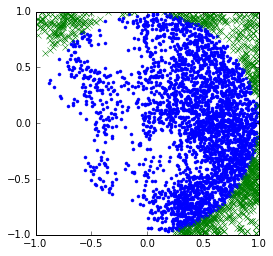

In [46]:
import random
import matplotlib.pyplot as plt   #Ploting Library 

x, y = 1.0, 1.0 #Initial position, in the middle
step_size = 0.1 
n_trials = 4000
n_inside = 0

data_inside_x = []
data_inside_y = []
data_outside_x = []
data_outside_y = []

for i in range(n_trials):
    #now we move randomly with our step size
    del_x, del_y = random.uniform(-step_size, step_size), random.uniform(-step_size, step_size)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
        #if we are still inside the square, we move
    if x**2 + y**2 < 1.0: 
        n_inside += 1
        #if we are still inside the circle, we count it
        data_inside_x.append(x)
        data_inside_y.append(y)
    else:
        data_outside_x.append(x)
        data_outside_y.append(y)

print "pi is approximatily", 4.0 * n_inside / float(n_trials)

plt.plot(data_inside_x,data_inside_y,'.')
plt.plot(data_outside_x,data_outside_y,'x')
plt.axes().set_aspect('equal')
plt.show() 


This does not look like we are really sampling the square uniformly, but if you are not convinced, try to run it longer!

pi is approximatily 3.252


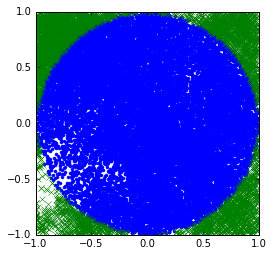

In [49]:
n_trials = 25000
n_inside = 0

data_inside_x = []
data_inside_y = []
data_outside_x = []
data_outside_y = []

for i in range(n_trials):
    #now we move randomly with our step size
    del_x, del_y = random.uniform(-step_size, step_size), random.uniform(-step_size, step_size)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
        #if we are still inside the square, we move
    if x**2 + y**2 < 1.0: 
        n_inside += 1
        #if we are still inside the circle, we count it
        data_inside_x.append(x)
        data_inside_y.append(y)
    else:
        data_outside_x.append(x)
        data_outside_y.append(y)

print "pi is approximatily", 4.0 * n_inside / float(n_trials)

plt.plot(data_inside_x,data_inside_y,'.')
plt.plot(data_outside_x,data_outside_y,'x')
plt.axes().set_aspect('equal')
plt.show() 


Looks better isn't it?